In [2]:
# THANK YOU - https://github.com/dcajasn/Riskfolio-Lib

import yfinance as yf
import yfinance as yf
import riskfolio as rp
from datetime import datetime


In [3]:
# Tickers we need data for.
assets = ['COMT', 'QYLD', 'SDIV', 'MORT']

# Sort tickers.
assets.sort()

# Download data
today = f'{datetime.today().strftime("%Y-%m-%d")}'

data = yf.download(assets, start='2000-01-01', end=today)

# Compute non-compounding, daily returns.
returns = data['Adj Close'].pct_change().dropna()


[*********************100%***********************]  5 of 5 completed


In [4]:
port = rp.Portfolio(returns=returns)

port.assets_stats(method_mu='hist', method_cov='hist', d=0.94)

w_rp = port.rp_optimization(
    model='Classic',  # Use historical.
    rm='MV',  # Use mean-variance optimization.
    hist=True,  # Use historical scenarios.
    rf=0,  # Set risk free rate to 0.
    b=None  # Don't use constraints.
)

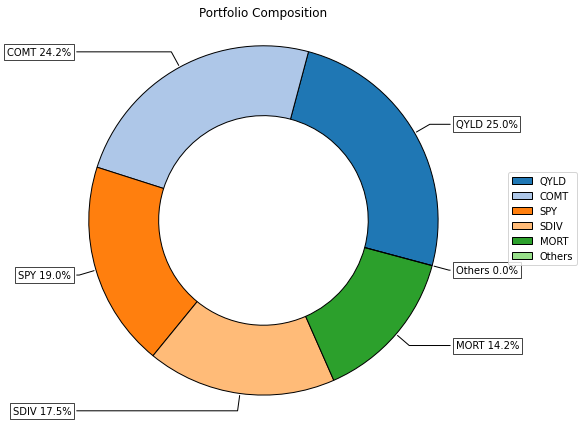

In [5]:
ax = rp.plot_pie(w=w_rp)

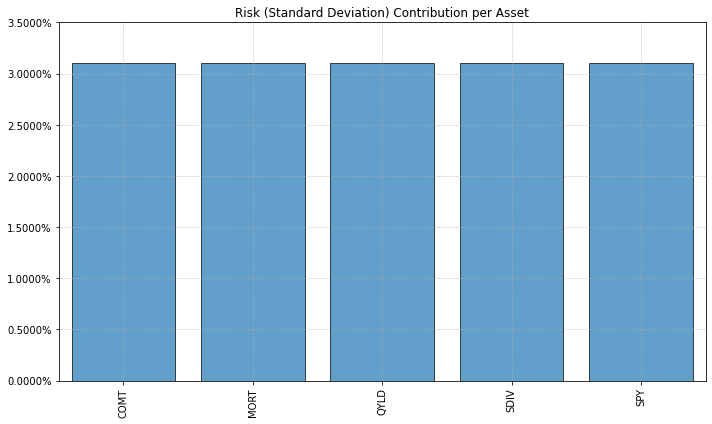

In [6]:
# Show the risk contribution for each asset is equal.
ax = rp.plot_risk_con(
    w_rp,
    cov=port.cov,
    returns=port.returns,
    rm='MV',
    rf=0,
)